In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Summery Points

1. Revenue Generated by individual operator.
2. Revenue Generated by individual branch.
3. Revenue Generated by individual driver.
4. Total pizza delivered by the individual driver.
5. Total pizza delivered by the individual Day or per week. week

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_csv("../Dataset/pizza_delivery.csv")

In [4]:
df.head(10)

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
0,Thursday,01-May-14,35.128367,Laura,East,Bruno,68.287716,58.4,4,0,0,1
1,Thursday,01-May-14,25.203074,Melissa,East,Salvatore,70.997791,26.4,2,0,0,0
2,Thursday,01-May-14,45.643404,Melissa,West,Salvatore,53.394145,58.1,3,1,0,0
3,Thursday,01-May-14,29.374298,Melissa,East,Salvatore,70.306596,35.2,3,0,0,0
4,Thursday,01-May-14,29.994610,Melissa,West,Salvatore,71.501688,38.4,2,0,0,0
5,Thursday,01-May-14,40.254321,Melissa,Centre,Bruno,60.759504,61.8,4,1,1,0
6,Thursday,01-May-14,48.728610,Laura,West,Bruno,58.258697,57.9,3,1,1,0
7,Thursday,01-May-14,34.027722,Melissa,West,Mario,68.127927,35.8,2,0,0,0
8,Thursday,01-May-14,28.209429,Laura,Centre,Mario,64.946607,36.6,2,0,0,0
9,Thursday,01-May-14,37.954792,Melissa,Centre,Bruno,60.007379,44.8,5,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                1266 non-null   object 
 1   date               1266 non-null   object 
 2   time               1266 non-null   float64
 3   operator           1266 non-null   object 
 4   branch             1266 non-null   object 
 5   driver             1266 non-null   object 
 6   temperature        1266 non-null   float64
 7   bill               1266 non-null   float64
 8   pizzas             1266 non-null   int64  
 9   free_wine          1266 non-null   int64  
 10  got_wine           1266 non-null   int64  
 11  discount_customer  1266 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 118.8+ KB


In [6]:
df.isnull().sum()

day                  0
date                 0
time                 0
operator             0
branch               0
driver               0
temperature          0
bill                 0
pizzas               0
free_wine            0
got_wine             0
discount_customer    0
dtype: int64

In [7]:
df.nunique()

day                     7
date                   31
time                 1266
operator                2
branch                  3
driver                  5
temperature          1266
bill                  438
pizzas                 10
free_wine               2
got_wine                2
discount_customer       2
dtype: int64

In [8]:
df.isna().sum()

day                  0
date                 0
time                 0
operator             0
branch               0
driver               0
temperature          0
bill                 0
pizzas               0
free_wine            0
got_wine             0
discount_customer    0
dtype: int64

In [9]:
df.nunique()

day                     7
date                   31
time                 1266
operator                2
branch                  3
driver                  5
temperature          1266
bill                  438
pizzas                 10
free_wine               2
got_wine                2
discount_customer       2
dtype: int64

**Total number of individual operator**

In [10]:
df["operator"].unique()

array(['Laura', 'Melissa'], dtype=object)

**Total number of branch**

In [11]:
df["branch"].unique()

array(['East', 'West', 'Centre'], dtype=object)

**Total numbers of drivers**

In [12]:
df["driver"].unique()

array(['Bruno', 'Salvatore', 'Mario', 'Luigi', 'Domenico'], dtype=object)

# Filtering the data

In [13]:
## create a group by operator

operator_group = df.groupby("operator")

In [14]:
operator_group.get_group("Laura")

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
0,Thursday,01-May-14,35.128367,Laura,East,Bruno,68.287716,58.4,4,0,0,1
6,Thursday,01-May-14,48.728610,Laura,West,Bruno,58.258697,57.9,3,1,1,0
8,Thursday,01-May-14,28.209429,Laura,Centre,Mario,64.946607,36.6,2,0,0,0
11,Thursday,01-May-14,24.807937,Laura,East,Mario,62.789668,49.7,3,0,0,0
14,Thursday,01-May-14,23.784281,Laura,West,Bruno,64.626456,25.9,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1258,Saturday,31-May-14,39.172779,Laura,East,Domenico,54.042554,31.4,3,0,0,0
1261,Saturday,31-May-14,38.639420,Laura,West,Mario,63.126424,46.7,4,0,0,0
1262,Saturday,31-May-14,33.812971,Laura,East,Domenico,56.302727,32.0,1,0,0,0
1263,Saturday,31-May-14,33.140080,Laura,Centre,Luigi,57.977168,45.7,3,0,0,1


### Revenue generated by individual operator

In [15]:
## calculate the bill generated by individual operator

operator_bill = operator_group.bill.sum()
operator_bill

operator
Laura      27163.0
Melissa    26966.0
Name: bill, dtype: float64

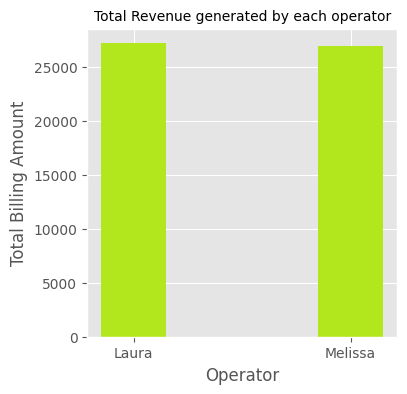

In [16]:
fig , axes = plt.subplots(figsize=(4,4))

# plot a bar graph
axes.bar(operator_bill.index, operator_bill, width=0.3, color='#B2E61D')

axes.set_xlabel("Operator")
axes.set_ylabel("Total Billing Amount")
plt.title("Total Revenue generated by each operator",  fontsize=10)
plt.show()

### Revenue Generated by individual branch

In [17]:
branch_group = df.groupby("branch")

In [18]:
branch_bill = branch_group.bill.sum()

In [19]:
branch_bill

branch
Centre    19831.4
East      15064.2
West      19233.4
Name: bill, dtype: float64

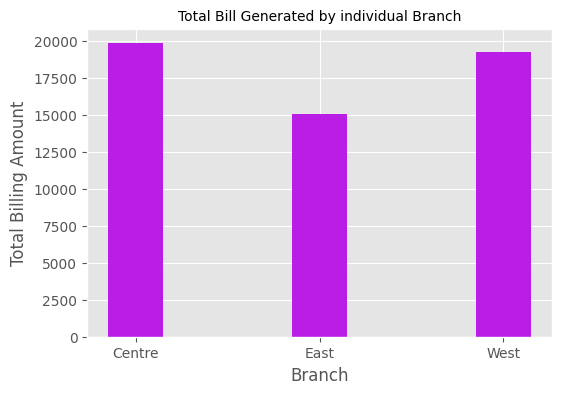

In [20]:
fig, axes = plt.subplots(figsize=(6,4))

axes.bar(branch_bill.index, branch_bill, width=.3, color="#BA1DE6")

axes.set_xlabel("Branch")
axes.set_ylabel("Total Billing Amount")
plt.title("Total Bill Generated by individual Branch", fontsize=10)
plt.show()

### Bill generated by individual operator on individual branch

In [21]:
operator_per_branch_bill = operator_group.apply(lambda group: group.groupby("branch").bill.sum())

In [22]:
operator_per_branch_bill

branch,Centre,East,West
operator,,,
Laura,10090.2,7598.2,9474.6
Melissa,9741.2,7466.0,9758.8


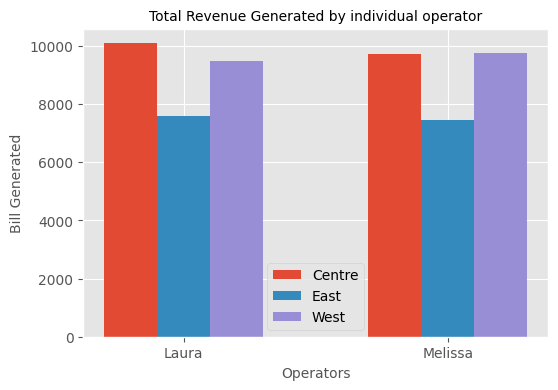

In [23]:
fig , axes = plt.subplots(figsize=(6,4))

width=0.2
offset = 0

labels = np.arange(len(operator_per_branch_bill.index))

for operator, values in operator_per_branch_bill.items():
    axes.bar(labels+offset, values, label=operator, width=width)
    offset+=width

midpoint = labels+(len(operator_per_branch_bill.columns)*width)/2
axes.set_xticks(midpoint-(width/2), operator_per_branch_bill.index)

axes.set_xlabel("Operators",  fontsize=10)
axes.set_ylabel("Bill Generated",  fontsize=10)

plt.title("Total Revenue Generated by individual operator" ,fontsize=10)

plt.legend()
plt.show()

### Revenue Generated by individual driver.

In [24]:
driver_group = df.groupby("driver")

In [25]:
driver_bill = driver_group.bill.sum()

In [26]:
driver_bill

driver
Bruno        14684.7
Domenico      3095.8
Luigi         5831.0
Mario        15364.6
Salvatore    15152.9
Name: bill, dtype: float64

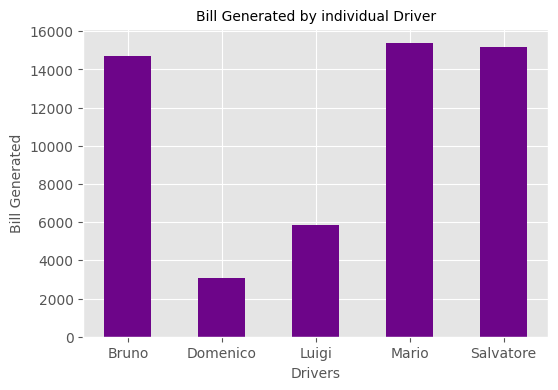

In [27]:
fig, axes = plt.subplots(figsize=(6,4))

axes.bar(driver_bill.index, driver_bill, color='#6D0589', width=0.5)
plt.title("Bill Generated by individual Driver",  fontsize=10)
axes.set_xlabel("Drivers",  fontsize=10)
axes.set_ylabel("Bill Generated",  fontsize=10)
plt.show()

### Revenue Generated by individual driver in individual branch

In [28]:
driver_bill_per_branch = driver_group.apply(lambda group:group.groupby("branch")["bill"].sum())

In [29]:
driver_bill_per_branch

branch,Centre,East,West
driver,,,
Bruno,6346.9,3083.4,5254.4
Domenico,589.1,1766.3,740.4
Luigi,1980.6,2204.9,1645.5
Mario,5157.0,4805.0,5402.6
Salvatore,5757.8,3204.6,6190.5


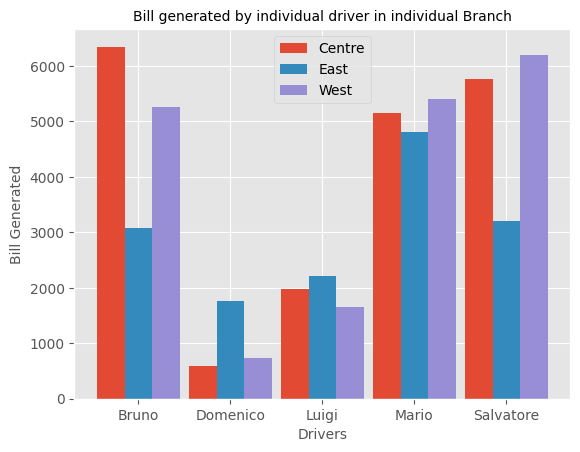

In [30]:
fig, axes = plt.subplots()

width = 0.3
offset= 0

labels = np.arange(len(driver_bill_per_branch.index))

for driver, values in driver_bill_per_branch.items():
    axes.bar(labels+offset, values, width=width, label=driver)
    offset +=width

midpoint = labels+(len(driver_bill_per_branch.columns)*width)/2
axes.set_xticks(midpoint-(width/2), driver_bill_per_branch.index)

axes.set_xlabel("Drivers",  fontsize=10)
axes.set_ylabel("Bill Generated",  fontsize=10)
plt.title("Bill generated by individual driver in individual Branch", fontsize=10)

axes.legend()
plt.show()

### Total pizza delivered by the individual driver.

In [31]:
df.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
0,Thursday,01-May-14,35.128367,Laura,East,Bruno,68.287716,58.4,4,0,0,1
1,Thursday,01-May-14,25.203074,Melissa,East,Salvatore,70.997791,26.4,2,0,0,0
2,Thursday,01-May-14,45.643404,Melissa,West,Salvatore,53.394145,58.1,3,1,0,0
3,Thursday,01-May-14,29.374298,Melissa,East,Salvatore,70.306596,35.2,3,0,0,0
4,Thursday,01-May-14,29.994610,Melissa,West,Salvatore,71.501688,38.4,2,0,0,0


In [32]:
pizza_delivered_per_driver = driver_group["pizzas"].sum()

In [33]:
pizza_delivered_per_driver

driver
Bruno        1046
Domenico      202
Luigi         390
Mario        1050
Salvatore    1127
Name: pizzas, dtype: int64

In [34]:
driver_deliveries = driver_group.pizzas.count()

In [35]:
driver_deliveries

driver
Bruno        329
Domenico      93
Luigi        142
Mario        358
Salvatore    344
Name: pizzas, dtype: int64

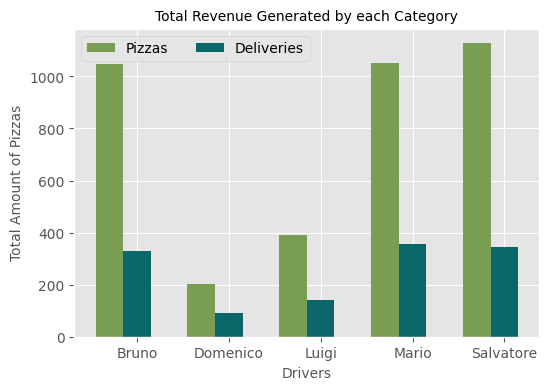

In [36]:
fig, axes = plt.subplots(figsize=(6,4))

wid = 0.3
offset = 0

labels = np.arange(len(driver_deliveries.index))

axes.bar(labels, pizza_delivered_per_driver, width=wid, color='#7A9D54', label="Pizzas")
axes.bar(labels+wid, driver_deliveries, width=wid, color="#0B666A", label="Deliveries")
axes.legend(loc='upper left', ncols=2)

# Now we need to set the axes labels
axes.set_xticks(labels+wid, driver_deliveries.index, fontsize=10)

# setting the x and y label
axes.set_xlabel("Drivers", fontsize=10)
axes.set_ylabel("Total Amount of Pizzas", fontsize=10)

# Now we will set the title for our graph.
plt.title("Total Revenue Generated by each Category" , fontsize=10)
plt.show()

### Find average temperature while delivery for individual on individual branch

In [37]:
average_temp_by_driver = branch_group.apply(lambda group:group.groupby("driver")["temperature"].mean())

In [38]:
average_temp_by_driver

driver,Bruno,Domenico,Luigi,Mario,Salvatore
branch,,,,,
Centre,59.568817,67.677830,60.093030,60.420333,59.929220
East,66.214833,69.710819,66.618642,65.859766,66.176617
West,61.265219,65.820147,62.884463,61.698723,61.514472


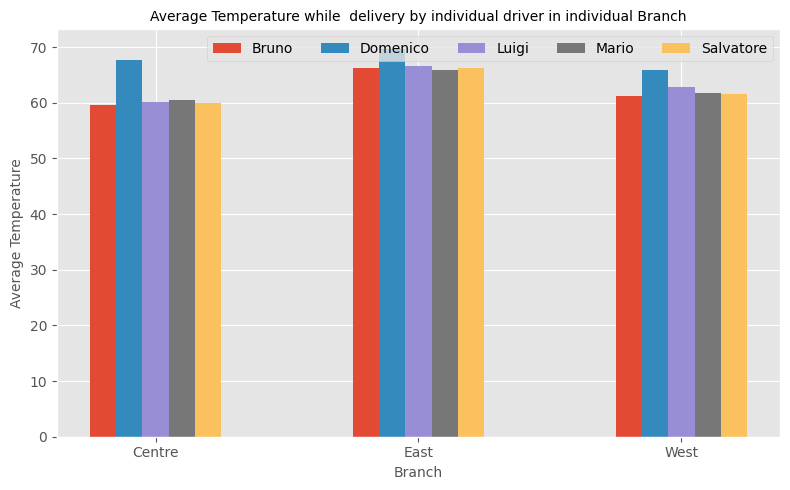

In [39]:
fig, axes = plt.subplots(figsize=(8,5), tight_layout=True)

width = 0.1
offset= 0

labels = np.arange(len(average_temp_by_driver.index))

for branch, values in average_temp_by_driver.items():
    axes.bar(labels+offset, values, width=width, label=branch)
    offset +=width

midpoint = labels+(len(average_temp_by_driver.columns)*width)/2
axes.set_xticks(midpoint-(width/2), average_temp_by_driver.index)

axes.set_xlabel("Branch",  fontsize=10)
axes.set_ylabel("Average Temperature",  fontsize=10)
plt.title("Average Temperature while  delivery by individual driver in individual Branch", fontsize=10)

axes.legend(loc="upper right", ncols=5)
plt.show()

### Revenue generated by driver on individual day

In [40]:
day_group = df.groupby("day")
driver_revenue_per_day = day_group.apply(lambda group:group.groupby("driver")["bill"].sum())

In [41]:
driver_revenue_per_day

day        driver   
Friday     Bruno        2836.1
           Luigi        2344.6
           Mario        2656.7
           Salvatore    2640.0
Monday     Bruno        2823.3
           Salvatore    3104.5
Saturday   Bruno        2410.1
           Domenico     1494.7
           Luigi        2195.4
           Mario        1764.4
           Salvatore    2453.3
Sunday     Bruno        1272.0
           Domenico     1601.1
           Luigi        1291.0
           Mario        1668.6
           Salvatore    1596.6
Thursday   Bruno        2572.8
           Mario        3122.3
           Salvatore    2771.7
Tuesday    Bruno        2770.4
           Mario        2830.4
Wednesday  Mario        3322.2
           Salvatore    2586.8
Name: bill, dtype: float64

In [42]:
def createGroup(dataframe):

    group = dataframe.groupby('driver')
    bill_sum = group["bill"].sum()
    bill_sum = bill_sum.reindex(['Bruno', 'Salvatore', 'Mario', 'Luigi', 'Domenico'])
    bill_sum = bill_sum.sort_index()
    return bill_sum

In [43]:
day_driver_data = day_group.apply(lambda group:createGroup(group))
day_driver_data.fillna(0, inplace=True)
day_driver_data

driver,Bruno,Domenico,Luigi,Mario,Salvatore
day,,,,,
Friday,2836.1,0.0,2344.6,2656.7,2640.0
Monday,2823.3,0.0,0.0,0.0,3104.5
Saturday,2410.1,1494.7,2195.4,1764.4,2453.3
Sunday,1272.0,1601.1,1291.0,1668.6,1596.6
Thursday,2572.8,0.0,0.0,3122.3,2771.7
Tuesday,2770.4,0.0,0.0,2830.4,0.0
Wednesday,0.0,0.0,0.0,3322.2,2586.8


In [44]:
day_driver_data["Total"] = day_driver_data.sum(axis=1)
day_driver_data

driver,Bruno,Domenico,Luigi,Mario,Salvatore,Total
day,,,,,,
Friday,2836.1,0.0,2344.6,2656.7,2640.0,10477.4
Monday,2823.3,0.0,0.0,0.0,3104.5,5927.8
Saturday,2410.1,1494.7,2195.4,1764.4,2453.3,10317.9
Sunday,1272.0,1601.1,1291.0,1668.6,1596.6,7429.3
Thursday,2572.8,0.0,0.0,3122.3,2771.7,8466.8
Tuesday,2770.4,0.0,0.0,2830.4,0.0,5600.8
Wednesday,0.0,0.0,0.0,3322.2,2586.8,5909.0


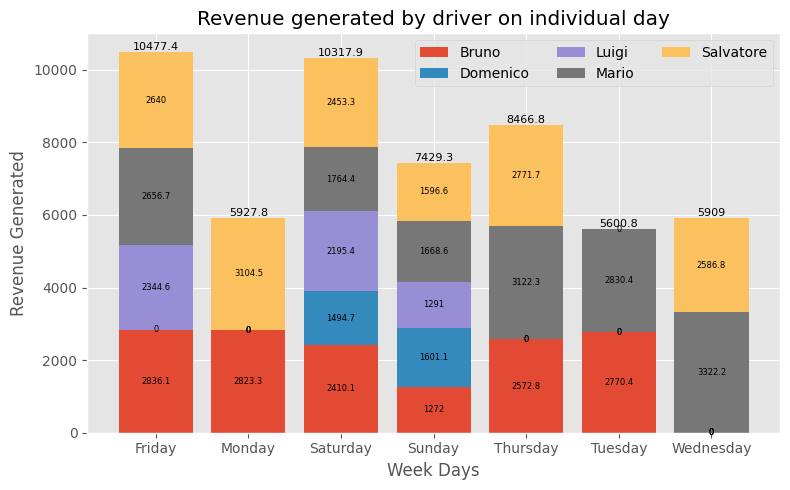

In [45]:
fig , axes = plt.subplots(figsize=(8,5), tight_layout = True)

offset = np.zeros(len(day_driver_data.index))

day_driver_data.drop('Total', axis=1, inplace=True)

for driver, column in day_driver_data.items():
    series_name = column.name
    bar = axes.bar(day_driver_data.index, column, label=series_name, bottom=offset)
    offset +=column

    axes.bar_label(bar, label_type='center', fontsize=6)

axes.bar_label(bar, fontsize=8)
axes.legend(loc='upper right', ncols = 3)
plt.title("Revenue generated by driver on individual day")
axes.set_xlabel("Week Days")
axes.set_ylabel("Revenue Generated")
plt.show()

###  Total Revenue Generated by Week Day and total pizza delivered

In [46]:
day_biil = day_group["bill"].sum()
day_pizza = day_group["pizzas"].sum()

day_data = pd.DataFrame({"Bill": day_biil, "Pizzas": day_pizza}, index=day_biil.index)
day_data

,Bill,Pizzas
day,,
Friday,10477.4,746
Monday,5927.8,408
Saturday,10317.9,736
Sunday,7429.3,531
Thursday,8466.8,577
Tuesday,5600.8,396
Wednesday,5909.0,421


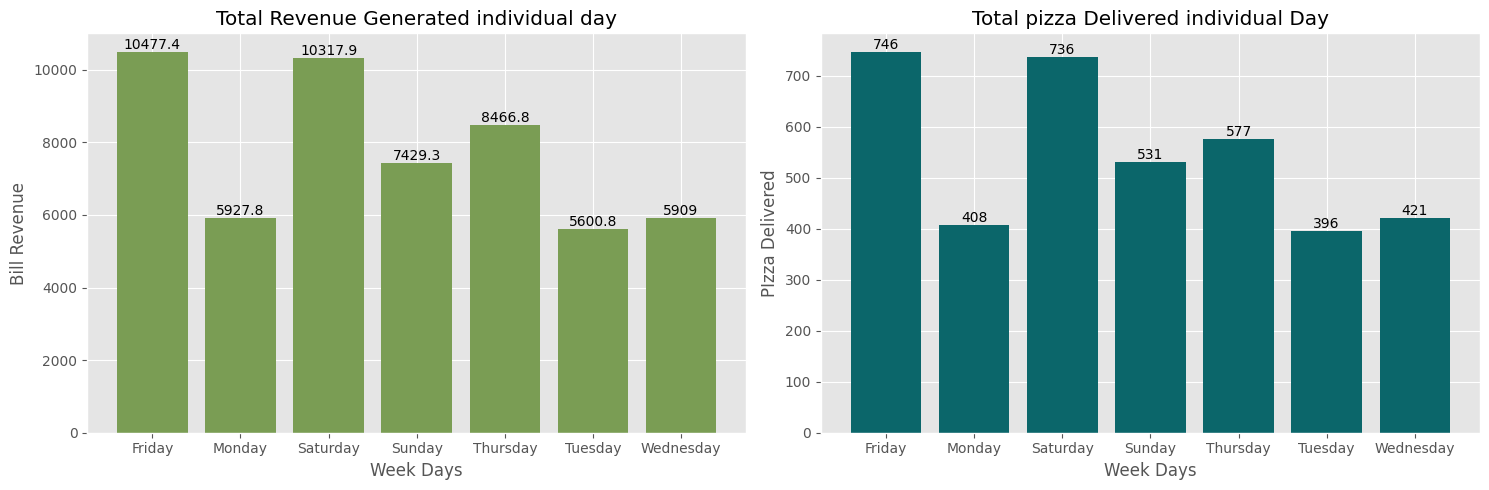

In [47]:
fig, (axes1, axes2) = plt.subplots(figsize=(15,5), tight_layout = True, ncols=2)

fig1 = axes1.bar(day_data.index, day_data.Bill, color="#7A9D54")
fig2 = axes2.bar(day_data.index, day_data.Pizzas, color="#0B666A")

axes1.set_xlabel("Week Days")
axes1.set_ylabel("Bill Revenue")

axes2.set_xlabel("Week Days")
axes2.set_ylabel("PIzza Delivered")

axes1.set_title("Total Revenue Generated individual day")
axes2.set_title("Total pizza Delivered individual Day")

axes1.bar_label(fig1)
axes2.bar_label(fig2)

plt.show()


In [56]:
day_group = df.groupby("date")

day_pizzas = day_group.pizzas.sum()
day_bill = day_group.bill.sum()
# day_day = day_group.day

date_summary =  pd.DataFrame(
    {"Bill": day_bill, 
     "Pizzas":day_pizzas, 
     "Day":day_group.day.apply(lambda x: x.drop_duplicates().item())}, index = day_pizzas.index)


date_summary

,Bill,Pizzas,Day
date,,,
01-May-14,2125.2,146,Thursday
02-May-14,2173.0,145,Friday
03-May-14,2111.0,170,Saturday
04-May-14,2011.1,155,Sunday
05-May-14,1400.9,105,Monday
06-May-14,1385.8,95,Tuesday
07-May-14,1494.7,103,Wednesday
08-May-14,1500.5,103,Thursday
09-May-14,2006.6,142,Friday


In [58]:
date_summary.sort_values("Pizzas", inplace=True)

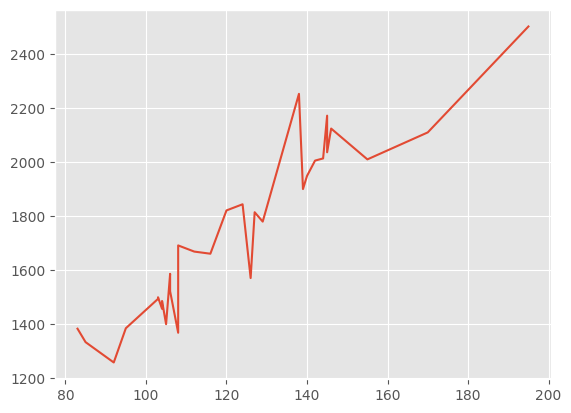

In [60]:
plt.plot(date_summary['Pizzas'],date_summary["Bill"])

(array([2., 0., 1., 1., 0., 5., 4., 1., 1., 1., 1., 2., 1., 0., 1., 3., 4.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 83.        ,  86.73333333,  90.46666667,  94.2       ,
         97.93333333, 101.66666667, 105.4       , 109.13333333,
        112.86666667, 116.6       , 120.33333333, 124.06666667,
        127.8       , 131.53333333, 135.26666667, 139.        ,
        142.73333333, 146.46666667, 150.2       , 153.93333333,
        157.66666667, 161.4       , 165.13333333, 168.86666667,
        172.6       , 176.33333333, 180.06666667, 183.8       ,
        187.53333333, 191.26666667, 195.        ]),
 <BarContainer object of 30 artists>)

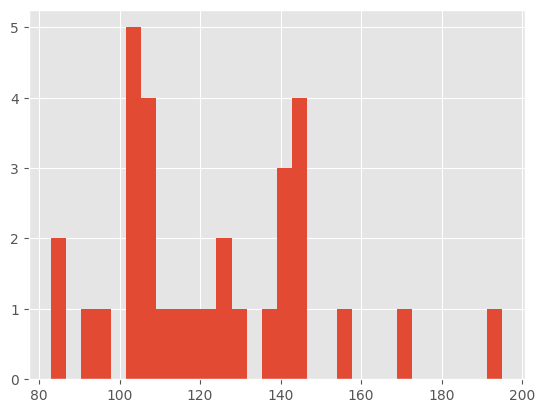

In [62]:
plt.hist(date_summary["Pizzas"], bins=30)

In [63]:
date_summary[date_summary["Pizzas"]> 140]

,Bill,Pizzas,Day
date,,,
09-May-14,2006.6,142,Friday
24-May-14,2014.6,144,Saturday
02-May-14,2173.0,145,Friday
31-May-14,2037.4,145,Saturday
01-May-14,2125.2,146,Thursday
04-May-14,2011.1,155,Sunday
03-May-14,2111.0,170,Saturday
16-May-14,2503.2,195,Friday


In [64]:
driver_group = df.groupby("driver")

In [70]:
driver_bill= driver_group.apply(lambda group:group["bill"].sum())

In [71]:
driver_bill

driver
Bruno        14684.7
Domenico      3095.8
Luigi         5831.0
Mario        15364.6
Salvatore    15152.9
dtype: float64

In [84]:
day_group = df.groupby("date")

day_pizzas = day_group.pizzas.sum()
day_bill = day_group.bill.sum()
# day_day = day_group.day

date_summarys =  pd.DataFrame(
    {"Bill": day_bill, 
     "Pizzas":day_pizzas, 
     "Day":day_group.day.apply(lambda x: x.drop_duplicates().item())}, index = day_pizzas.index)

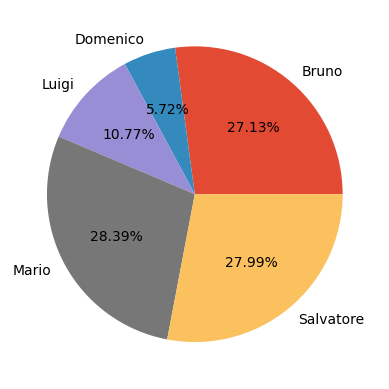

In [82]:
fig, ax = plt.subplots()

ax.pie(driver_bill, labels=driver_bill.index, autopct=lambda pct: f"{pct:.2f}%")

plt.show()

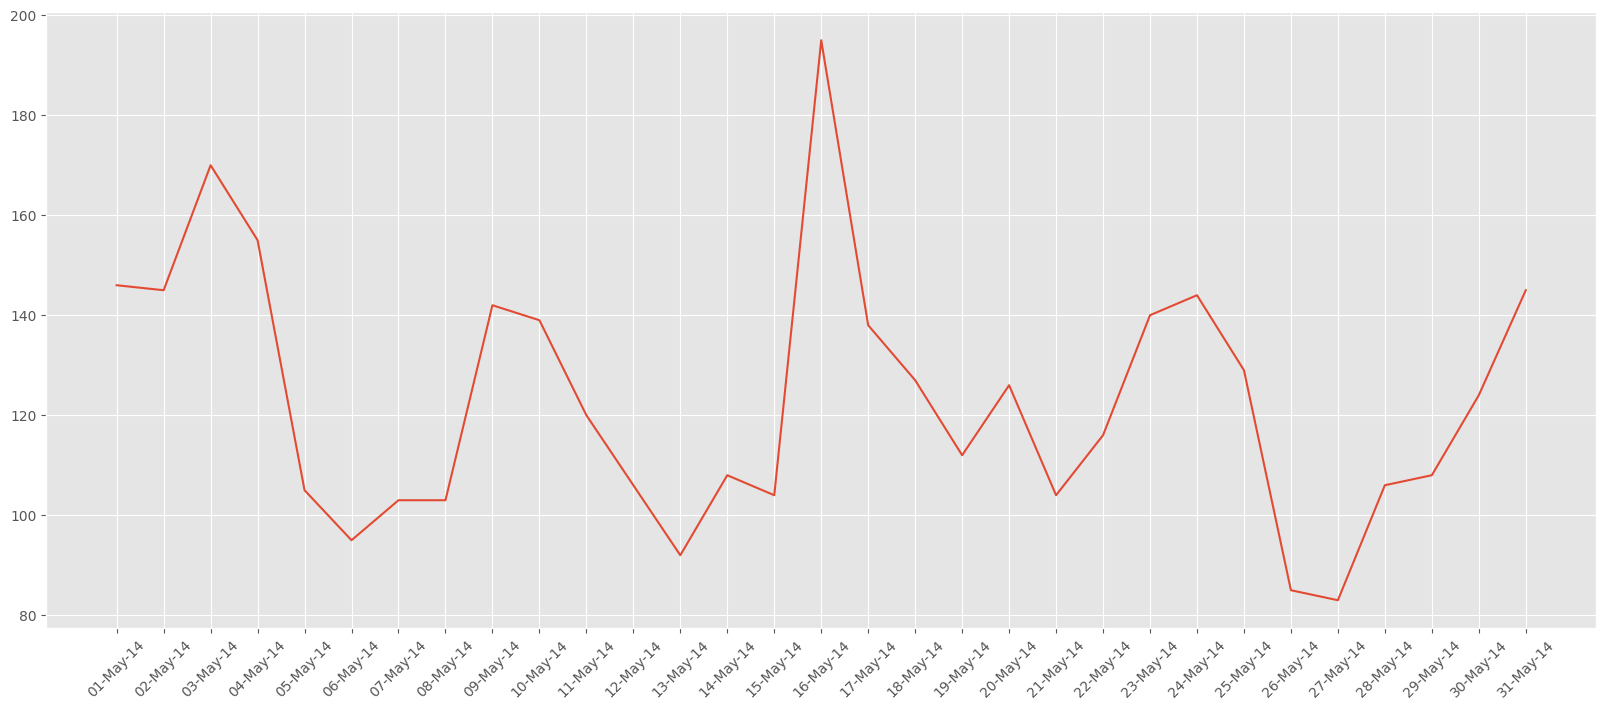

In [92]:
fig, axes=plt.subplots(figsize=(20,8))

axes.plot(date_summarys.index, date_summarys["Pizzas"])
axes.tick_params(axis='x', rotation = 45)
# axes.bar_label(date_summarys["Day"])
plt.show()

In [1]:
import pandas as pd

# Sample DataFrame with a "country" column
data = {
    "country": ["USA", "Canada", "UK", "Germany", "France"],
}

df = pd.DataFrame(data)

# Create a new column based on the "country" column
df['content'] = df['country'].apply(lambda x: f"Content for {x}")

# Display the updated DataFrame
print(df)


   country              content
0      USA      Content for USA
1   Canada   Content for Canada
2       UK       Content for UK
3  Germany  Content for Germany
4   France   Content for France
